#### Install requirements and read in data

In [1]:
# !pip install scikit-video

In [19]:
import os, cv2, scipy.signal, skvideo.io, skvideo.motion, json
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from time import time
import pandas as pd

In [20]:
vid_in_dir = 'mp4Vids/'
out_dir = "sendToAMT" # image sequence frames for labeling
# path_to_json = 'AMTresponses/' # response files

# 0-11 cards, 12-23 chess, 24-35 puzzle, 46-48 jenga
vid_name_list = ["cards_courtyard_T_B", "cards_courtyard_B_T", 
                 "cards_courtyard_H_S", "cards_courtyard_S_H",
                 "cards_livingroom_T_B", "cards_livingroom_B_T",
                 "cards_livingroom_H_S", "cards_livingroom_S_H",
                 "cards_office_T_H", "cards_office_H_T",
                 "cards_office_B_S", "cards_office_S_B",
                 
                 "chess_courtyard_T_B", "chess_courtyard_B_T", 
                 "chess_courtyard_H_S", "chess_courtyard_S_H",
                 "chess_livingroom_T_B", "chess_livingroom_B_T",
                 "chess_livingroom_H_S", "chess_livingroom_S_H",
                 "chess_office_T_B", "chess_office_B_T",
                 "chess_office_H_S", "chess_office_S_H",
                 
                 "puzzle_courtyard_T_H", "puzzle_courtyard_H_T", 
                 "puzzle_courtyard_B_S", "puzzle_courtyard_S_B",
                 "puzzle_livingroom_T_B", "puzzle_livingroom_B_T",
                 "puzzle_livingroom_H_S", "puzzle_livingroom_S_H",
                 "puzzle_office_H_B", "puzzle_office_B_H",
                 "puzzle_office_T_S", "puzzle_office_S_T",
                 
                 "jenga_courtyard_T_S", "jenga_courtyard_S_T", 
                 "jenga_courtyard_H_B", "jenga_courtyard_B_H",
                 "jenga_livingroom_T_B", "jenga_livingroom_B_T",
                 "jenga_livingroom_H_S", "jenga_livingroom_S_H",
                 "jenga_office_T_B", "jenga_office_B_T",
                 "jenga_office_H_S", "jenga_office_S_H",
                 "IMG_3715"]

vid_name = vid_name_list[48] # cards_courtyard_T_B
v1 = skvideo.io.vread(vid_in_dir + vid_name + " copy.mp4")
print("v1 shape:{}".format(v1.shape))
print("vid_name:{}".format(vid_name))

v1 shape:(1750, 720, 1280, 3)
vid_name:IMG_3715


#### Clip the last few frames so all videos are the same size. Some vids were 2699, 2698 and 2700 frames long.

In [21]:
def clip_frame(in_frame):
#     return in_frame[:2691,:,:,:]
    return in_frame[:1746,:,:,:]

v1 = clip_frame(v1) #/255.0
print("v1 shape:{}".format(v1.shape))

v1 shape:(1746, 720, 1280, 3)


#### Reshape the data into 9-frame clips

In [22]:
# v1_9 = v1.reshape(299, 9, 720, 1280, 3)
v1_9 = v1.reshape(194, 9, 720, 1280, 3)

print("v1_9 shape:{}".format(v1_9.shape))

v1_9 shape:(194, 9, 720, 1280, 3)


#### Convert the 9-frame clips into a 3x3 tile of images with frame numbers. These will be used for labeling

completed: IMG_3715_0_0_8


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


completed: IMG_3715_1_9_17
completed: IMG_3715_2_18_26


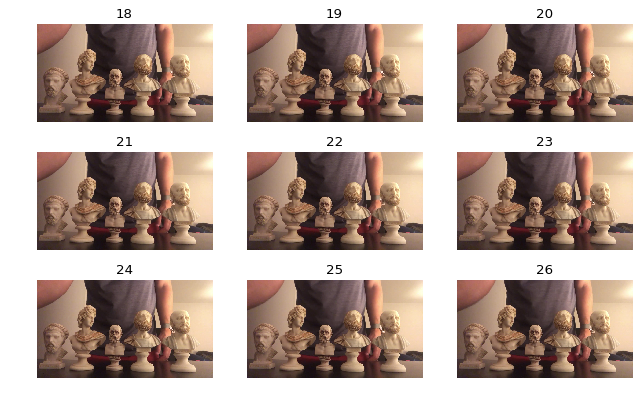

In [23]:
plt.figure(figsize=(8*1.2, 5*1.2), dpi=80, facecolor='w', edgecolor='k')

start_batch = 0
batches = 2
for batch in range(start_batch, start_batch + batches+1): 
    
    n_9batch = batch
    sample_frame = 0
    incr = 1

    clip_name = vid_name + "_" + str(n_9batch) + "_" + str(n_9batch*9) + "_" + str(n_9batch*9 + 8)

    for n in range(1, 10):

        plt.subplot(3, 3, n)
        plt.imshow(v1_9[n_9batch][sample_frame + (n-1)*incr])
        plt.axis('off')
        plt.title(n_9batch*9 + (n-1)*incr)
        plt.savefig(os.path.join(out_dir, clip_name), bbox_inches='tight')

    print("completed: {}".format(clip_name))
    